In [1]:
import pandas as pd
import numpy as np

In [2]:
anuncios = pd.read_csv('https://raw.githubusercontent.com/afoone/caipc-laberit-jul2022/master/Advertising.csv')

In [3]:
anuncios

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
import statsmodels.formula.api as smf

In [5]:
regresion = smf.ols(formula='Sales~TV', data=anuncios).fit()


In [6]:
regresion.params

Intercept    7.032594
TV           0.047537
dtype: float64

Sales = 7.032594 + 0.047537 * TV

In [7]:
import matplotlib.pyplot as plt

In [8]:
sales_prediction = regresion.predict(anuncios[['TV']])

In [9]:
sales_prediction

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

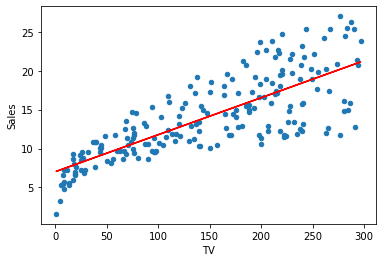

In [10]:

%matplotlib inline
anuncios.plot(kind='scatter', x="TV", y="Sales")
plt.plot(anuncios[['TV']], sales_prediction, color="red")


In [11]:
anuncios['Sales'].mean()

14.0225

In [12]:
regresion.rsquared

0.611875050850071

In [13]:
regresion.rsquared_adj

0.6099148238341623

In [14]:
regresion.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.47e-42
Time:                        16:17:17   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
regresion.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [16]:
anuncios['predicted'] = anuncios['TV'].apply(lambda x: x*0.047537 + 7.032594)

In [17]:
anuncios

,TV,Radio,Newspaper,Sales,predicted
0,230.1,37.8,69.2,22.1,17.970858
1,44.5,39.3,45.1,10.4,9.147990
2,17.2,45.9,69.3,9.3,7.850230
3,151.5,41.3,58.5,18.5,14.234450
4,180.8,10.8,58.4,12.9,15.627284
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,8.848507
196,94.2,4.9,8.1,9.7,11.510579
197,177.0,9.3,6.4,12.8,15.446643
198,283.6,42.0,66.2,25.5,20.514087


In [18]:
anuncios['RSE'] = (anuncios['Sales']-anuncios['predicted'])**2

In [19]:
# SSD 
anuncios['RSE'].sum()

2102.530583889652

In [20]:
anuncios

,TV,Radio,Newspaper,Sales,predicted,RSE
0,230.1,37.8,69.2,22.1,17.970858,17.049816
1,44.5,39.3,45.1,10.4,9.147990,1.567528
2,17.2,45.9,69.3,9.3,7.850230,2.101832
3,151.5,41.3,58.5,18.5,14.234450,18.194921
4,180.8,10.8,58.4,12.9,15.627284,7.438076
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,8.848507,1.558771
196,94.2,4.9,8.1,9.7,11.510579,3.278198
197,177.0,9.3,6.4,12.8,15.446643,7.004719
198,283.6,42.0,66.2,25.5,20.514087,24.859326


(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

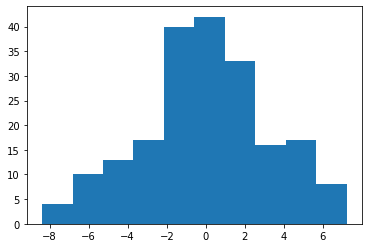

In [21]:
plt.hist(anuncios['Sales']-anuncios['predicted'])

# Regresión múltiple

- Sales~TV
- Sales~Newspaper
- Sales~Radio
- Sales~TV+Newspaper
- Sales~TV+Radio
- Sales~Newspaper+Radio
- Sales~Newspaper+Radio+TV

In [22]:
regresion2 = smf.ols(formula= 'Sales~TV+Newspaper', data=anuncios).fit()
regresion2.rsquared_adj

0.6422399150864777

In [23]:
regresion2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [24]:
regresion2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           3.95e-45
Time:                        16:17:17   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
smf.ols(formula= 'Sales~TV+Radio', data=anuncios).fit().rsquared_adj

0.8961505479974428

In [26]:
smf.ols(formula= 'Sales~Newspaper+Radio', data=anuncios).fit().rsquared_adj

0.3259306172899197

In [27]:
smf.ols(formula= 'Sales~Newspaper+Radio+TV', data=anuncios).fit().rsquared_adj

0.8956373316204668

In [28]:
sin_newspaper = smf.ols(formula= 'Sales~TV+Radio', data=anuncios).fit()
con_newspaper = smf.ols(formula= 'Sales~Newspaper+Radio+TV', data=anuncios).fit()


In [29]:
sin_newspaper.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           4.83e-98
Time:                        16:17:17   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
con_newspaper.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        16:17:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
TV             0.0458      0.001     32.809      0.000       0.043       0.049
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multicolinealidad

Factor inflación de la varianza 

Si dentro del modelo hay correlaciones que hay que eliminar

- VIF = 1: No hay variables correlacionadas
- VIF < 5: Hay variables correlacionadas, el modelo sigue funcionando (esto no quiere decir que sea mejor o peor quitarlas)
- VIF >= 5: Elimina inmediatamente las variables correlacionadas

In [31]:
anuncios[['TV', 'Radio', 'Newspaper']].corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


In [32]:
lm_todo = smf.ols(formula='Sales~TV+Radio+Newspaper', data=anuncios).fit()
(1/(1-lm_todo.rsquared))

9.728633219271856

# Busqueda de linealidad

In [46]:
ventas = {
    'mes': [1,2,3,4,5,6,7,8,9],
    'ventas': [12.6, 17, 30, 63.8, 160, 415, 1110, 3000, 8120]
}

In [47]:
ventas_df = pd.DataFrame(ventas)

In [48]:
ventas_df.head()

,mes,ventas
0,1,12.6
1,2,17.0
2,3,30.0
3,4,63.8
4,5,160.0


<AxesSubplot:xlabel='mes', ylabel='ventas'>

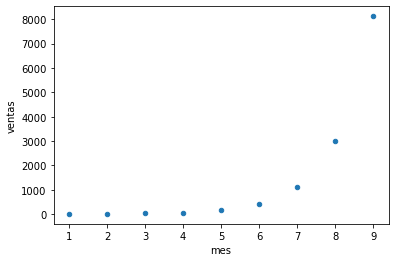

In [52]:
ventas_df.plot(kind='scatter', x='mes', y='ventas')

<AxesSubplot:xlabel='mes'>

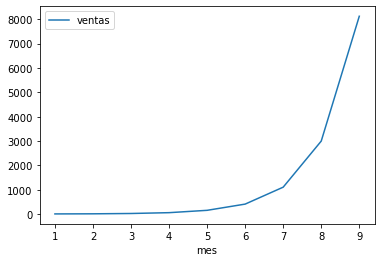

In [53]:
ventas_df.plot(kind='line', x='mes', y='ventas')

In [54]:
regresion_hockey = smf.ols(formula= 'ventas~mes', data=ventas_df).fit()

In [58]:
regresion_hockey.rsquared

0.5554709323746905

In [63]:
ventas_df['ventas_log'] = ventas_df['ventas'].apply(lambda x: np.log(x))

<AxesSubplot:xlabel='mes', ylabel='ventas_log'>

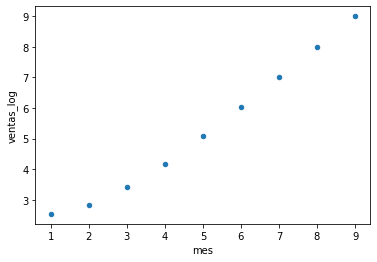

In [64]:
ventas_df.plot(kind='scatter', x='mes', y='ventas_log')

In [65]:
regresion_hockey2 = smf.ols(formula= 'ventas_log~mes', data=ventas_df).fit()

In [68]:
regresion_hockey2.rsquared

0.9838356956728378

In [69]:
regresion_hockey2.params

Intercept    1.131372
mes          0.841456
dtype: float64

In [71]:
1.13 + 0.84*8

7.85

In [73]:
np.e**7.85

2565.7343168347975

# scikitlearn

In [74]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR 


In [75]:
anuncios

,TV,Radio,Newspaper,Sales,predicted,RSE
0,230.1,37.8,69.2,22.1,17.970858,17.049816
1,44.5,39.3,45.1,10.4,9.147990,1.567528
2,17.2,45.9,69.3,9.3,7.850230,2.101832
3,151.5,41.3,58.5,18.5,14.234450,18.194921
4,180.8,10.8,58.4,12.9,15.627284,7.438076
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,8.848507,1.558771
196,94.2,4.9,8.1,9.7,11.510579,3.278198
197,177.0,9.3,6.4,12.8,15.446643,7.004719
198,283.6,42.0,66.2,25.5,20.514087,24.859326


In [76]:
anuncios = pd.read_csv('https://raw.githubusercontent.com/afoone/caipc-laberit-jul2022/master/Advertising.csv')

In [77]:
anuncios.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [78]:
X = anuncios[['TV', 'Radio', 'Newspaper']]
y = anuncios['Sales']

In [79]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [81]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [86]:
estimador_SVR = SVR(kernel='linear')
selector = RFE(estimador_SVR, n_features_to_select=2, step=1).fit(X, y)

In [87]:
selector.support_

array([ True,  True, False])

In [88]:
selector2 = RFE(estimador_SVR, n_features_to_select=1, step=1).fit(X, y)
selector2.support_

array([False,  True, False])

In [90]:
selector.ranking_

array([1, 1, 2])

In [91]:
selector2.ranking_

array([2, 1, 3])

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
# Instanciar un linear regression
lr = LinearRegression()
# hacer el fit
lr.fit(X[['TV', 'Radio']], y)





LinearRegression()

In [94]:
lr.intercept_

2.9210999124051362

In [95]:
lr.coef_

array([0.04575482, 0.18799423])

In [97]:
lr.predict(X[['TV', 'Radio']])

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696,
        7.0358597 , 17.25652015, 10.60866187,  8.81095051, 18.44466773,
       20.82891539, 12.90386507, 23.24107626,  9.94121476, 14.15384619,
       18.12139161, 14.74206357,  6.51417168, 16.54402663,  8.14035215,
       15.6080206 , 14.96769383, 17.0463346 , 19.39954145,  9.15929748,
       21.64292187, 11.35791808,  7.65045928, 18.83346334,  7.56302763,
       16.99280099, 23.36720719, 15.6258994 ,  9.91257829, 20.4405801 ,
       16.37872122, 17.29870935, 21.5621537 , 13.96692266,  8.9009974 ,
       15.16263814,  8.88644967, 21.69944046, 16.28690268,  8.18162949,
       12.64569407,  9.31962792, 20.66180115, 19.96126242, 20.35512357,
       21.30864743,  8.53774783, 12.76239488, 21.89072858, 18.10746914,
        5.74497097, 22.90418658, 16.78413768, 13.18474853, 16.96570907,
        7.82652846,  8.98703456, 12.02066194, 18.95313425, 21.09

In [99]:
lr.score(X[['TV', 'Radio']], y)

0.8971942610828956